# Corporate Sustainability Data Analysis

Research Question: Can companies be both sustainable and profitable?

See Dataset and the 3 Tests We Performed Below

In [1]:
import pandas as pd

df = pd.read_csv("CS216 Data from Refinitiv.xlsx - Sheet1.csv", skiprows=0, header=0) 
df = df.drop(0)
df = df.drop(1)
# df.loc[1] = df.loc[1].replace('FY0', '2022')
# df.loc[1] = df.loc[1].replace('FY-1', '2021')
# df.loc[1] = df.loc[1].replace('FY-2', '2020')
# df.loc[1] = df.loc[1].replace('FY-3', '2019')
# df.loc[1] = df.loc[1].replace('FY-4', '2018')
# df.loc[1] = df.loc[1].replace('FY-5', '2017')
# df.loc[1] = df.loc[1].replace('FY-6', '2016')
# df.loc[1] = df.loc[1].replace('FY-7', '2015')
# df.loc[1] = df.loc[1].replace('FY-8', '2014')
# df.loc[1] = df.loc[1].replace('FY-9', '2013')
# df.loc[1] = df.loc[1].fillna('')
# df.columns = df.columns.map(str)
# df.loc[1] = df.loc[1].astype(str)
# # # create a dictionary of old and new column names
# new_columns = {col: col + ' ' + df.iloc[0, i] for i, col in enumerate(df.columns)}
# # rename the columns using the dictionary
# df = df.rename(columns=new_columns)

df['First Name'] = df['Company Common Name'].str.split().str.get(0).str.lower()
valid_names = ['conocophillips', 'phillips', 'dover','eog','marathon','northrop','howmet','chesapeake','boeing','chevron','devon','pioneer','kinder','targa','caterpillar','exxon','lockheed','occidental','valero','textron']
mask = df['First Name'].isin(valid_names)
common_df = df[mask]

# filtering df for key columns
common_df = df[['Company Common Name', 'First Name', 'ESG Score', 'Gross Profit Margin - %']]
print(f"Dimensions of dataframe: {common_df.shape}")
common_df.head()
# df = df.dropna(subset=[df.columns[1]])


Dimensions of dataframe: (70, 4)


,Company Common Name,First Name,ESG Score,Gross Profit Margin - %
2,Deere & Co,deere,72.53285105,30.11556
3,Fortive Corp,fortive,52.28061879,57.73383
4,Energy Transfer LP,energy,35.15829576,14.99844
5,Conocophillips,conocophillips,69.15836688,38.23604
6,Rockwell Automation Inc,rockwell,66.08648861,39.97217


In [2]:
ghg = pd.read_csv("ghgp_data_by_year.xlsx - Direct Emitters.csv")
ghg.columns = ghg.iloc[2]
ghg = ghg.drop(ghg.index[0:3]).reset_index(drop=True)
ghg['First Name'] = ghg['Facility Name'].str.split().str.get(0).str.lower()
mask = ghg['First Name'].isin(valid_names)
ghg = ghg[mask]
common_ghg = ghg[['Facility Name','First Name','2019 Total reported direct emissions','2018 Total reported direct emissions',
                   '2017 Total reported direct emissions','2016 Total reported direct emissions','2015 Total reported direct emissions',
                   '2014 Total reported direct emissions','2013 Total reported direct emissions']]
common_ghg = common_ghg.dropna()

print(f"Dimensions of dataframe: {common_ghg.shape}")
common_ghg.head()



Dimensions of dataframe: (71, 9)


2,Facility Name,First Name,2019 Total reported direct emissions,2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions
708,BOEING HELICOPTER DIV,boeing,26577.784,23041.044,23084.59,23286.044,22962.336,24727.424,23355.606
968,Boeing Commercial Airplanes - Everett,boeing,77571.608,72308.124,80529.196,76191.108,66275.6,73522.368,73643.472
1170,CATERPILLAR INC.-MAPLETON,caterpillar,195498.718,190681.32,183279.394,184592.746,187345.338,191628.218,190613.224
1171,CATERPILLAR INCORPORATED,caterpillar,41850.192,39753.764,36399.066,34466.95,44499.236,47106.45,43265.062
1258,CHEVRON PHILLIPS - SWEENY COMPLEX,chevron,1007533.584,1207685.91,1248425.432,1343200.826,1463560.21,1442486.034,1465448.414


# Merged Dataset

In [3]:
merged_df = common_df.merge(common_ghg, how = 'inner', on = ['First Name'])
print(f"Dimensions of dataframe: {merged_df.shape}")
merged_df.head()

Dimensions of dataframe: (74, 12)


,Company Common Name,First Name,ESG Score,Gross Profit Margin - %,Facility Name,2019 Total reported direct emissions,2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions
0,Conocophillips,conocophillips,69.15836688,38.23604,ConocoPhillips Alaska Inc - KRU CPF1,548907.32,559895.994,556345.812,527827.632,531887.898,525680.146,508247.132
1,Conocophillips,conocophillips,69.15836688,38.23604,ConocoPhillips Alaska Inc - KRU CPF2,411757.652,403745.38,409212.208,403872.28,402551.632,375513.688,342683.71
2,Conocophillips,conocophillips,69.15836688,38.23604,ConocoPhillips Alaska Inc - KRU CPF3,311368.376,326384.072,330327.66,323277.432,318928.648,311777.676,324522.28
3,Conocophillips,conocophillips,69.15836688,38.23604,ConocoPhillips Alaska Inc - KRU STP,90838.108,93078.1,96875.784,87432.32,90229.06,71703.428,79851.2
4,Marathon Oil Corp,marathon,75.35463579,67.74917,MARATHON COUNTY LANDFILL,46550.65,81478.5,95391.1,67269.35,56163.8,66269.6,28598.9


In [4]:
merged_df['2019 Total reported direct emissions'] = merged_df['2019 Total reported direct emissions'].astype(float)
merged_df['2018 Total reported direct emissions'] = merged_df['2018 Total reported direct emissions'].astype(float)
merged_df['2017 Total reported direct emissions'] = merged_df['2017 Total reported direct emissions'].astype(float)
merged_df['2016 Total reported direct emissions'] = merged_df['2016 Total reported direct emissions'].astype(float)
merged_df['2015 Total reported direct emissions'] = merged_df['2015 Total reported direct emissions'].astype(float)
merged_df['2014 Total reported direct emissions'] = merged_df['2014 Total reported direct emissions'].astype(float)
merged_df['2013 Total reported direct emissions'] = merged_df['2013 Total reported direct emissions'].astype(float)
merged_df['ESG Score'] = merged_df['2013 Total reported direct emissions'].astype(float)
merged_df['Gross Profit Margin - %'] = merged_df['Gross Profit Margin - %'].astype(float)
# group by name and calculate the mean of score
grouped = merged_df.groupby('First Name')[['2019 Total reported direct emissions','2018 Total reported direct emissions',
                   '2017 Total reported direct emissions','2016 Total reported direct emissions','2015 Total reported direct emissions',
                   '2014 Total reported direct emissions','2013 Total reported direct emissions']].transform('mean')

# add the result as a new column to the original dataframe
merged_df['2019 mean'] = grouped['2019 Total reported direct emissions']
merged_df['2018 mean'] = grouped['2018 Total reported direct emissions']
merged_df['2017 mean'] = grouped['2017 Total reported direct emissions']
merged_df['2016 mean'] = grouped['2016 Total reported direct emissions']
merged_df['2015 mean'] = grouped['2015 Total reported direct emissions']
merged_df['2014 mean'] = grouped['2014 Total reported direct emissions']
merged_df['2013 mean'] = grouped['2013 Total reported direct emissions']
merged_df.head()

# use the describe method to get summary statistics
summary = merged_df.describe()
summary = summary[['ESG Score', 'Gross Profit Margin - %', '2019 mean','2018 mean','2017 mean','2016 mean','2015 mean','2014 mean','2013 mean']]

# print the summary statistics
print(summary)

          ESG Score  Gross Profit Margin - %     2019 mean     2018 mean  \
count  7.400000e+01                74.000000  7.400000e+01  7.400000e+01   
mean   7.532664e+05                25.291073  8.044345e+05  8.267983e+05   
std    9.902517e+05                17.566923  6.231439e+05  6.483266e+05   
min    9.700464e+03                 5.299660  3.328836e+04  2.164816e+04   
25%    7.692513e+04                 9.483910  3.407179e+05  3.457759e+05   
50%    1.935921e+05                20.747530  7.720106e+05  8.055838e+05   
75%    1.007585e+06                37.699065  7.730320e+05  8.055838e+05   
max    4.027458e+06                67.749170  2.013443e+06  2.116148e+06   

          2017 mean     2016 mean     2015 mean     2014 mean     2013 mean  
count  7.400000e+01  7.400000e+01  7.400000e+01  7.400000e+01  7.400000e+01  
mean   8.043232e+05  8.153329e+05  7.894362e+05  7.601673e+05  7.532664e+05  
std    6.178773e+05  6.305696e+05  6.083706e+05  5.631320e+05  5.543680e+05  
min

In [5]:
filtered_df = df[['Company Common Name', 'First Name', 'ESG Score', 'Gross Profit Margin - %']]
filtered_df.head()

,Company Common Name,First Name,ESG Score,Gross Profit Margin - %
2,Deere & Co,deere,72.53285105,30.11556
3,Fortive Corp,fortive,52.28061879,57.73383
4,Energy Transfer LP,energy,35.15829576,14.99844
5,Conocophillips,conocophillips,69.15836688,38.23604
6,Rockwell Automation Inc,rockwell,66.08648861,39.97217


In [6]:
#doing some calculations to find null values
null_values = filtered_df.isna().sum()
print(null_values)

Company Common Name        0
First Name                 0
ESG Score                  0
Gross Profit Margin - %    1
dtype: int64


In [7]:
filtered_df.columns

Index(['Company Common Name', 'First Name', 'ESG Score',
       'Gross Profit Margin - %'],
      dtype='object')

# Test 1: Correlation between ESG Score and Gross Profit Margin

Examine the correlation between ESG Score and Gross Profit Margin (%).

Hypothesis:
Null hypothesis (H0): There is no correlation between ESG Score and Gross Profit Margin
Alternative hypothesis (H1): There is a correlation between ESG Score and Gross Profit Margin

This code calculates the Pearson correlation coefficient and the p-value. If the p-value is less than the significance level of 0.05, we can reject the null hypothesis in favor of the alternative hypothesis, which would suggest that there is a correlation between ESG Score and Gross Profit Margin. 

A positive correlation coefficient would indicate that companies with higher ESG scores tend to have higher profitability (measured by Gross Profit Margin), while a negative correlation coefficient would suggest the opposite.

In [8]:
import scipy.stats as stats
import numpy as np
import scipy.stats as stats

# Remove rows with NaN values in ESG Score and Return on Average Total Assets columns
clean_data = filtered_df[['ESG Score', 'Gross Profit Margin - %']].dropna()

# Convert columns to numeric data types
clean_data['ESG Score'] = pd.to_numeric(clean_data['ESG Score'], errors='coerce')
clean_data['Gross Profit Margin - %'] = pd.to_numeric(clean_data['Gross Profit Margin - %'], errors='coerce')

# Remove any rows with NaN values after the conversion
clean_data = clean_data.dropna()

# Perform Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(clean_data['ESG Score'], clean_data['Gross Profit Margin - %'])

print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: -0.33501905539828686
p-value: 0.004895272456831515


# Test 2: Two-Sample T-test: Gross Profit Margin and ESG


H0 (null hypothesis): There is no significant difference in the gross profit margins between companies with high ESG scores and those with low ESG scores. In other words, the average gross profit margin is the same for both groups.

Ha (alternative hypothesis): There is a significant difference in the gross profit margins between companies with high ESG scores and those with low ESG scores. The average gross profit margin is not the same for both groups.

After performing the t-test, we obtain a p-value. If the p-value is smaller than a predetermined significance level (e.g., 0.05), we reject the null hypothesis in favor of the alternative hypothesis. This would mean that there is a significant difference in the gross profit margins between companies with high ESG scores and those with low ESG scores.

If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis, which means we do not have enough evidence to conclude that there is a significant difference in the gross profit margins between the two groups.


In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Assuming 'filtered_df' is the DataFrame you have created earlier

# Remove rows with NaN values in ESG Score and Gross Profit Margin columns
clean_data = filtered_df[['ESG Score', 'Gross Profit Margin - %']].dropna()

# Convert columns to numeric data types
clean_data['ESG Score'] = pd.to_numeric(clean_data['ESG Score'], errors='coerce')
clean_data['Gross Profit Margin - %'] = pd.to_numeric(clean_data['Gross Profit Margin - %'], errors='coerce')

# Remove any rows with NaN values after the conversion
clean_data = clean_data.dropna()

# Determine the median ESG score
median_esg_score = np.median(clean_data['ESG Score'])

# Split the data into two groups based on ESG scores
high_esg = clean_data[clean_data['ESG Score'] > median_esg_score]['Gross Profit Margin - %']
low_esg = clean_data[clean_data['ESG Score'] <= median_esg_score]['Gross Profit Margin - %']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(high_esg, low_esg, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -3.06769931344316
p-value: 0.003154550828946232


# Test 3: Confidence Interval: Gross Profit Margin and ESG

Hypothesis: Companies with higher ESG scores have higher profitability compared to companies with lower ESG scores.

To test this hypothesis, we will calculate the 95% confidence interval for the difference in means between the profitability of companies with ESG scores in the top quartile and the bottom quartile.


Check whether the confidence interval contains 0. If it does not contain 0, then we can conclude that there is a statistically significant difference in profitability between companies with high and low ESG scores.

In [10]:
# Determine the mean ESG score
mean_esg_score = np.mean(clean_data['ESG Score'])

# Split the data into two groups based on ESG scores
high_esg = clean_data[clean_data['ESG Score'] >= mean_esg_score]
low_esg = clean_data[clean_data['ESG Score'] < mean_esg_score]

# Calculate the mean and standard deviation of Gross Profit Margin for each group
mean_gpm_high_esg = np.mean(high_esg['Gross Profit Margin - %'])
std_gpm_high_esg = np.std(high_esg['Gross Profit Margin - %'])
mean_gpm_low_esg = np.mean(low_esg['Gross Profit Margin - %'])
std_gpm_low_esg = np.std(low_esg['Gross Profit Margin - %'])

# Calculate the standard error of the mean for each group
se_high_esg = std_gpm_high_esg / np.sqrt(len(high_esg))
se_low_esg = std_gpm_low_esg / np.sqrt(len(low_esg))

# Calculate the confidence interval for the difference between the means
mean_diff = mean_gpm_high_esg - mean_gpm_low_esg
margin_of_error = 1.96 * np.sqrt(se_high_esg**2 + se_low_esg**2)
confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)

# Print the results
print(f"Mean Gross Profit Margin for high ESG score companies: {mean_gpm_high_esg:.2f}")
print(f"Mean Gross Profit Margin for low ESG score companies: {mean_gpm_low_esg:.2f}")
print(f"Difference in means: {mean_diff:.2f}")
print(f"95% Confidence Interval: {confidence_interval}")

Mean Gross Profit Margin for high ESG score companies: 31.24
Mean Gross Profit Margin for low ESG score companies: 45.25
Difference in means: -14.01
95% Confidence Interval: (-22.64913509036849, -5.3745368260078035)


## Visualizations

In [11]:
filtered_df

,Company Common Name,First Name,ESG Score,Gross Profit Margin - %
2,Deere & Co,deere,72.53285105,30.11556
3,Fortive Corp,fortive,52.28061879,57.73383
4,Energy Transfer LP,energy,35.15829576,14.99844
5,Conocophillips,conocophillips,69.15836688,38.23604
6,Rockwell Automation Inc,rockwell,66.08648861,39.97217
...,...,...,...,...
67,Textron Inc,textron,78.52447545,20.74753
68,Watsco Inc,watsco,26.78389223,27.91027
69,Williams Companies Inc,williams,70.84760384,51.84989
70,Otis Worldwide Corp,otis,68.3681801,28.6445


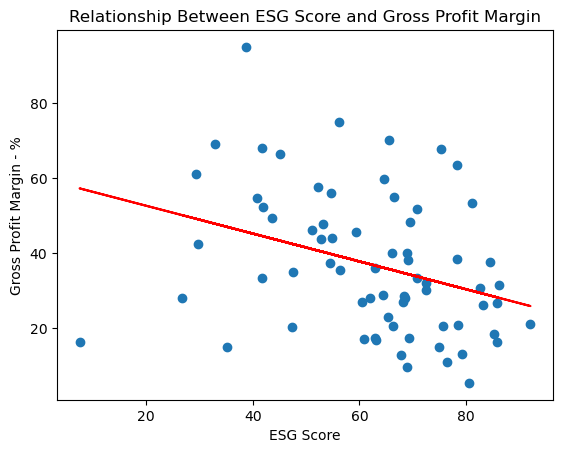

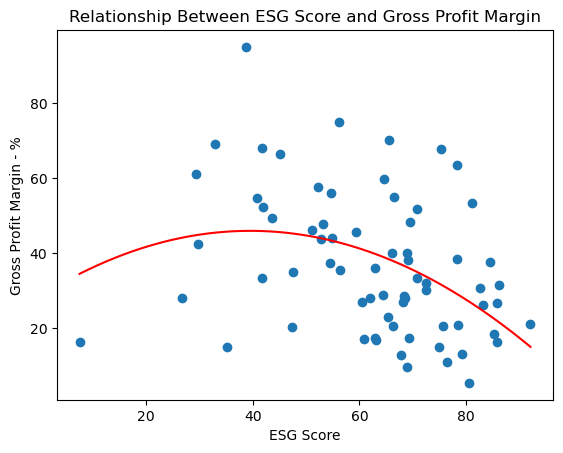

Correlation coefficient: -0.3350190553982867


In [12]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

filtered_df = filtered_df.dropna()

# Remove inf and NaN values from numpy arrays
x_data = filtered_df['ESG Score'].astype(float).values
y_data = filtered_df['Gross Profit Margin - %'].astype(float).values
x_data = x_data[np.isfinite(x_data)]
y_data = y_data[np.isfinite(y_data)]

m, b = np.polyfit(x_data, y_data, 1)

# Plot scatterplot and regression line
fig, ax = plt.subplots()
ax.scatter(x_data, y_data)
ax.plot(x_data, m*x_data + b, color='red')
ax.set_xlabel('ESG Score')
ax.set_ylabel('Gross Profit Margin - %')
ax.set_title('Relationship Between ESG Score and Gross Profit Margin')

def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

# Fit the curve to the data
popt, pcov = curve_fit(quadratic, x_data, y_data)

# Generate the curve points
x_curve = np.linspace(x_data.min(), x_data.max(), 100)
y_curve = quadratic(x_curve, *popt)

# Plot the scatterplot and the curve
fig, ax = plt.subplots()
ax.scatter(x_data, y_data)
ax.plot(x_curve, y_curve, color='red')
ax.set_xlabel('ESG Score')
ax.set_ylabel('Gross Profit Margin - %')
ax.set_title('Relationship Between ESG Score and Gross Profit Margin')

# Display the plot
plt.show()

# Calculate the correlation coefficient between ESG scores and gross profit margin
corr = filtered_df['ESG Score'].astype(float).corr(filtered_df['Gross Profit Margin - %'].astype(float))
print(f"Correlation coefficient: {corr}")

/var/folders/09/xq5d7hf957x2_1g315l71j880000gn/T/ipykernel_3417/4068020754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Gross Profit Margin - %'] = pd.to_numeric(filtered_df['Gross Profit Margin - %'], errors='coerce')


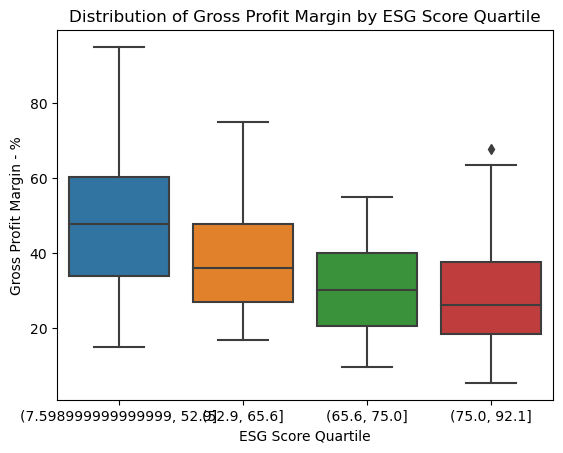

In [13]:
import seaborn as sns

filtered_df.loc[:, 'Gross Profit Margin - %'] = pd.to_numeric(filtered_df['Gross Profit Margin - %'], errors='coerce')

# Divide ESG scores into quartiles
quartiles = pd.qcut(filtered_df['ESG Score'].astype(float).round(1), q=4)

# Create box plots
sns.boxplot(x=quartiles, y='Gross Profit Margin - %', data=filtered_df)
plt.xlabel('ESG Score Quartile')
plt.ylabel('Gross Profit Margin - %')
plt.title('Distribution of Gross Profit Margin by ESG Score Quartile')
plt.show()

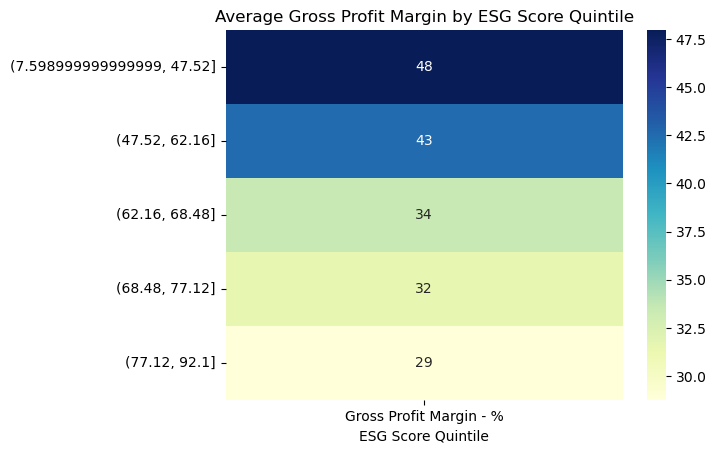

In [14]:
quintiles = pd.qcut(filtered_df['ESG Score'].astype(float).round(1), q=5)

# Create pivot table to calculate mean gross profit margin for each quintile
pivot_table = pd.pivot_table(filtered_df, values='Gross Profit Margin - %', index=quintiles, aggfunc=np.mean)

# Create heatmap
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.xlabel('ESG Score Quintile')
plt.ylabel('')
plt.title('Average Gross Profit Margin by ESG Score Quintile')
plt.show()